In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(z: np.array) -> float:
    return np.exp(-10*(z[0]**2-z[1])**2 - (z[1]-0.25)**4)

In [3]:
def alpha(z: np.array, z1: np.array) -> float:
    a = f(z1) / f(z)
    return min(a, 1)

In [4]:
z0 = np.array([-2, -2])
N = 2000
sigma = 1

In [8]:
z = [z0]
for i in range(N):
    proposal = np.random.randn(2)*sigma + z[-1]
    accept = alpha(z[-1], proposal)
    r = np.random.uniform(size=1)
    if accept > r:
        z.append(proposal)

In [9]:
x = np.meshgrid(np.linspace(-3, 2, 100), np.linspace(-3, 2, 100))

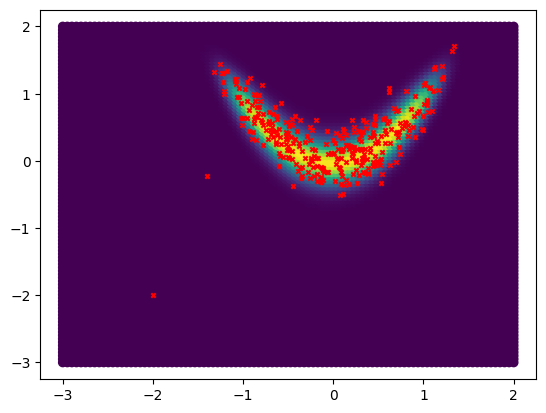

In [10]:
plt.scatter(x[0], x[1], c=f(x))
plt.scatter(np.array(z)[:,0], np.array(z)[:,1], c='red', marker='x', s=10)

### Linear Regression

In [153]:
def log_likelihood(a: float, b:float, x:np.array, y:np.array, log_sigma:float) -> float:
    return np.sum(-(y - (a + b*x))**2 / (2*np.exp(log_sigma)**2) - log_sigma)

In [154]:
size = 20
log_sigma_model = 1
x = np.linspace(0, 10, size)
y = 10 + x + np.random.randn(size) * np.exp(log_sigma_model)

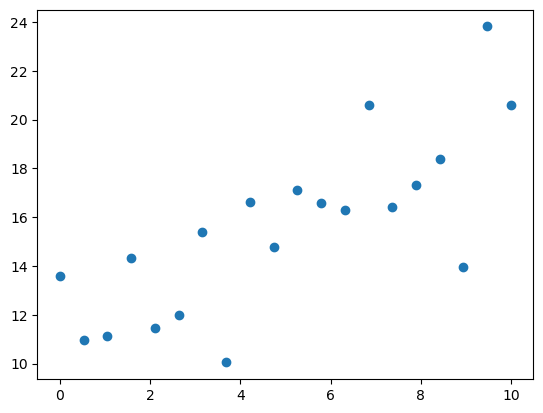

In [155]:
plt.scatter(x, y)
plt.show()

In [159]:
N = 10000
z0 = np.array([1.0, 0.1, 0.0])
sigma_mcmc = np.array([1.0, 1.0, 1.0])

In [160]:
z = [z0]
for i in range(N):
    proposal = np.random.randn(3) * sigma_mcmc + z[-1]
    
    l1 = log_likelihood(proposal[0], proposal[1], x, y, proposal[2])
    l0 = log_likelihood(z[-1][0], z[-1][1], x, y, z[-1][2])
    accept = min(1, np.exp(l1 - l0))
    
    r = np.random.uniform(size=1)
    if accept > r:
        z.append(proposal)

C:\Users\letzi\AppData\Local\Temp\ipykernel_17916\1395496266.py:7: RuntimeWarning: overflow encountered in exp
  accept = min(1, np.exp(l1 - l0))


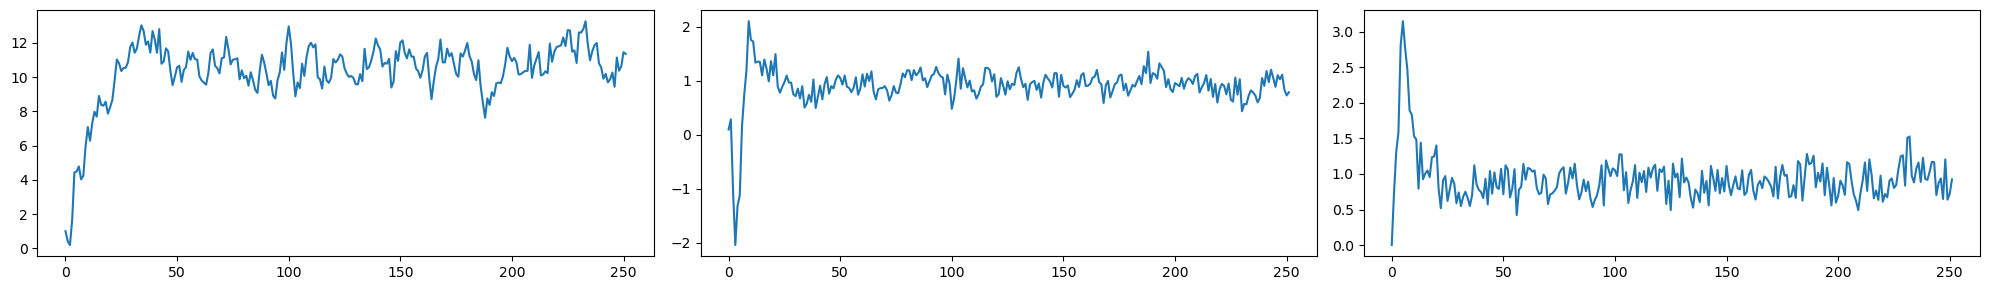

In [167]:
fig, ax = plt.subplots(1, 3, figsize=(20, 3))

plt.sca(ax[0])
plt.plot(np.array(z)[:,0])

plt.sca(ax[1])
plt.plot(np.array(z)[:,1])

plt.sca(ax[2])
plt.plot(np.array(z)[:,2])

plt.tight_layout()
plt.show()

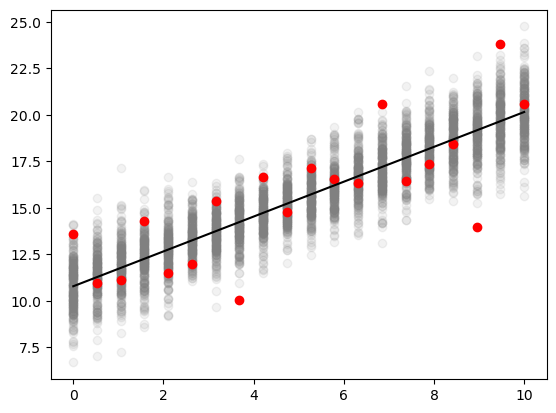

In [165]:
for s in z[int(0.1*len(z))::1]:
    s_aux = s[0] + s[1]*x + np.random.randn(size)*s[2]
    plt.scatter(x, s_aux, c='gray', alpha=0.1)
    #plt.plot(aux, s[0] + s[1]*aux, c='red', alpha=0.1)
plt.plot(x, np.array(z[int(0.1*len(z))::1])[:,0].mean() + np.array(z[int(0.1*len(z))::1])[:,1].mean()*x, c='black')
plt.scatter(x, y, c='red')
plt.show()